In [115]:
import pandas as pd 
import numpy as np

#import необходимых модулей

from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score

import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor

%matplotlib inline

In [310]:
train = pd.ExcelFile('data/Train.xlsx')
train_m = train.parse('Monthly', index_col=0, na_values='Forecast')
train_q = train.parse('Quarterly', index_col=0, na_values='Forecast')
del train

train_m = inc_first_transfrow(train_m).astype(float) 
train_q = inc_first_transfrow(train_q).astype(float)

In [271]:
def inc_first_transfrow(df):
    # Incorporate first row into columns' names
    df.columns = df.iloc[0,:].fillna('v').values + "_" + df.columns 
    df = df.iloc[1:]
    return df 

In [313]:
train_m.describe()

,"v_Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения","v_Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения","v_Диффузный индекс заработной платы, ожидаемые изменения","v_Диффузный индекс занятости, ожидаемые изменения","v_Диффузный индекс выпуска, ожидаемые изменения","v_Диффузный индекс закупок оборудования, ожидаемые изменения","v_Диффузный индекс финансового состояния, ожидаемые изменения","v_Диффузный индекс портфеля заказов, ожидаемые изменения","v_Диффузный индекс задолженности банкам, ожидаемые изменения","ln_Производство скота и птицы, тыс.тонн",...,"ln_Среднемесячная пенсия, руб.",ln_Реальная пенсия,v_MIACR,"v_Ставка по краткосрочным кредитам, население","v_Ставка по долгосрочным кредитам, население","v_Ставка по краткосрочным кредитам, фирмы","v_Ставка по долгосрочным кредитам, фирмы","ln_Краткосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","ln_Долгосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","ln_Цена Urals, долл/бар"
count,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,70.275641,85.628205,63.50000,43.179487,52.852564,34.333333,54.596154,57.108974,24.711538,6.680447,...,8.498510,0.578796,5.420250,23.210590,18.344045,11.348660,12.639179,8.229336,8.597713,4.199111
std,8.230215,6.009904,9.46675,6.015557,10.934883,6.230345,8.277275,9.834484,3.526873,0.319674,...,0.680459,0.347712,3.310019,3.546629,1.854030,2.412382,1.805275,0.548556,1.123447,0.458252
min,52.000000,69.000000,38.00000,24.000000,21.000000,18.000000,29.000000,32.000000,15.000000,6.173786,...,7.288791,-0.001091,0.921000,17.145000,14.615000,7.939000,9.711000,6.993658,6.290272,3.130242
25%,64.750000,81.750000,57.00000,40.000000,45.000000,30.000000,50.000000,49.750000,23.000000,6.404401,...,7.892685,0.256532,3.069500,20.370750,17.230000,9.520750,11.215750,7.785511,7.598119,3.882233
50%,70.000000,85.500000,64.00000,43.000000,54.000000,35.000000,56.000000,58.000000,25.000000,6.682725,...,8.549495,0.567462,4.867000,23.240000,18.448000,10.686000,12.269500,8.365871,9.018580,4.245569
75%,76.000000,90.250000,71.00000,47.250000,61.000000,38.000000,61.000000,65.000000,27.000000,6.898951,...,9.122257,0.924559,6.394000,25.112000,19.657000,12.425000,13.644250,8.642305,9.533104,4.660194
max,89.000000,98.000000,80.00000,56.000000,73.000000,48.000000,70.000000,76.000000,35.000000,7.414573,...,9.401118,0.997020,16.965000,33.577000,23.300000,19.864000,19.600000,8.983678,10.131233,4.865307


In [314]:
train_q.describe()

,"ln_ВВП, млрд",ln_Реальный ВВП,"ln_ВВП A, млрд.руб.","ln_ВВП B, млрд.руб.","ln_ВВП C, млрд.руб.","ln_ВВП D, млрд.руб.","ln_ВВП E, млрд.руб.","ln_ВВП F, млрд.руб.","ln_ВВП G, млрд.руб.","ln_ВВП H, млрд.руб.",...,ln_Реальный ВВП K,ln_Реальный ВВП L,ln_Реальный ВВП M,ln_Реальный ВВП N,ln_Реальный ВВП O,ln_Реальные налоги на продукты,ln_Реальные субсидии на продукты,"ln_Инвестиции, собственные средства, млрд.руб.","ln_Инвестиции, привлеченные средства, млрд.руб.","ln_Инвестиции, бюджетные средства, млрд.руб."
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,9.244955,0.362354,5.659078,3.034289,6.671732,7.145562,5.615418,6.330177,7.375588,4.374676,...,0.422317,0.098968,-0.005949,0.085078,0.189211,0.331678,-0.261055,6.350054,6.561126,5.409640
std,0.566434,0.146351,0.740594,0.414295,0.650946,0.527906,0.588042,0.690026,0.507704,0.608349,...,0.245585,0.053120,0.041822,0.053416,0.099194,0.134806,0.221111,0.675265,0.734148,0.820257
min,8.041233,0.000000,4.273602,2.480033,5.133081,5.926435,4.357089,4.884884,6.374866,2.944192,...,-0.087127,-0.025185,-0.078568,0.000000,0.000000,0.000000,-0.616826,4.872905,4.911183,3.832980
25%,8.825932,0.270024,5.079341,2.689455,6.329448,6.845814,5.157313,5.765828,6.997412,3.899968,...,0.203324,0.066058,-0.041670,0.042093,0.133589,0.242905,-0.427757,5.853447,6.062947,4.825999
50%,9.324399,0.391307,5.685815,2.936335,6.762117,7.204609,5.704755,6.466092,7.499223,4.515173,...,0.496044,0.108019,-0.005276,0.080797,0.158773,0.365127,-0.284468,6.395489,6.606971,5.459197
75%,9.741472,0.467115,6.260549,3.326336,7.237202,7.568053,6.071053,6.922694,7.807231,4.862251,...,0.624930,0.135630,0.021546,0.111491,0.225308,0.430409,-0.103955,6.883913,7.015166,5.922297
max,10.046713,0.597999,7.165638,4.005985,7.581304,8.029572,6.518491,7.536249,8.072115,5.189876,...,0.779464,0.182750,0.077546,0.227901,0.485755,0.530615,0.211227,7.536684,7.865687,6.957402


# Строим трейн

In [175]:
def plot_every_col_m(df):
    ylines_x_grey = np.ravel([[f'{_y}m{_m:02d}' for _m in [3,6,9]] for _y in range(2003, 2016)])
    ylines_x_red = np.ravel([[f'{_y}m{_m:02d}' for _m in [12]] for _y in range(2003, 2016)])
    for _col in df.columns:
        to_plot = df.loc[:, _col]
        plt.figure(figsize=(16,4))
        plt.title(_col)
        xlabels = [val if (i+1)%3==0 else '' for i,val in enumerate(df.index) ]
        plt.xticks(ticks=range(0,len(xlabels)), 
                   labels=xlabels,
                   rotation=45)
        plt.plot(to_plot)
        [plt.axvline(x=_yline_x, c='grey') for _yline_x in ylines_x_grey]
        [plt.axvline(x=_yline_x, c='red') for _yline_x in ylines_x_red]
        plt.show()
        break
        

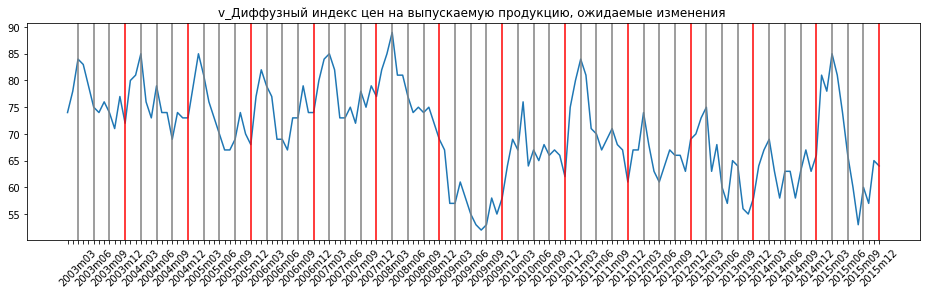

In [176]:
plot_every_col_m(train_m)

In [147]:
def plot_every_col_q(df):
    ylines_x_grey = np.ravel([[f'{_y}m{_m:02d}' for _m in [3,6,9]] for _y in range(2003, 2016)])
    ylines_x_red = np.ravel([[f'{_y}m{_m:02d}' for _m in [12]] for _y in range(2003, 2016)])
    for _col in df.columns:
        to_plot = df.loc[:, _col]
        plt.figure(figsize=(16,4))
        plt.title(_col)
#         xlabels = [val if (i+1)%3==0 else '' for i,val in enumerate(df.index) ]
        plt.xticks(
#             ticks=range(0,len(xlabels)), 
#             labels=xlabels,
            rotation=45
        )
        plt.plot(to_plot)
        [plt.axvline(x=_yline_x, c='grey') for _yline_x in ylines_x_grey]
        [plt.axvline(x=_yline_x, c='red') for _yline_x in ylines_x_red]
        plt.show()


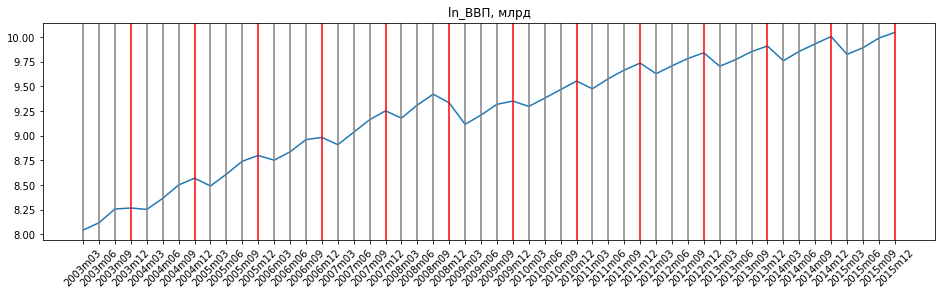

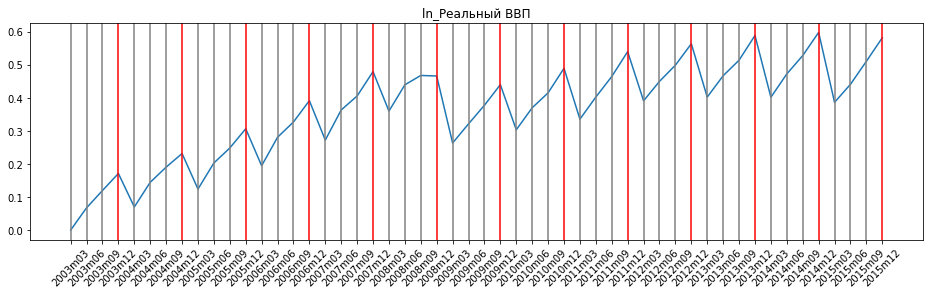

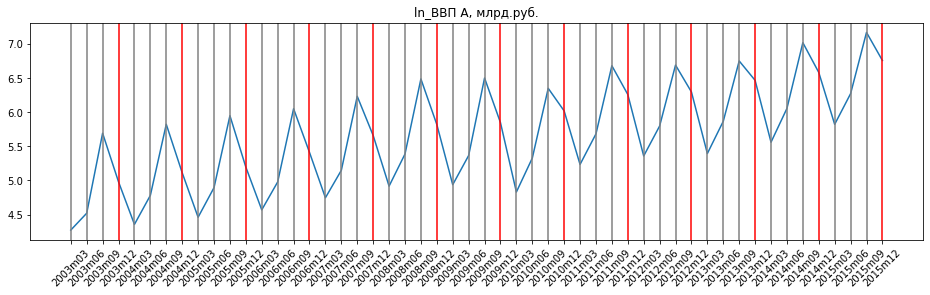

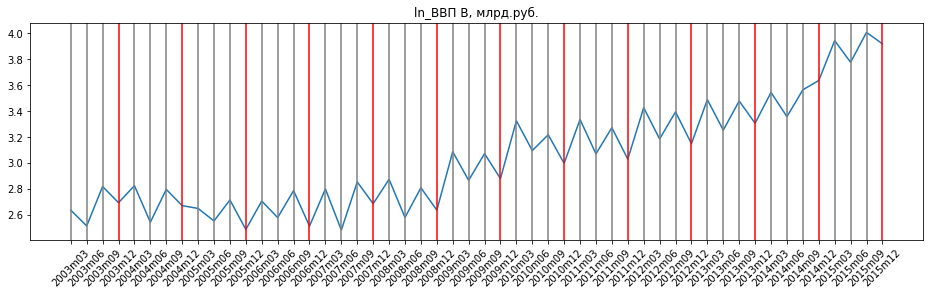

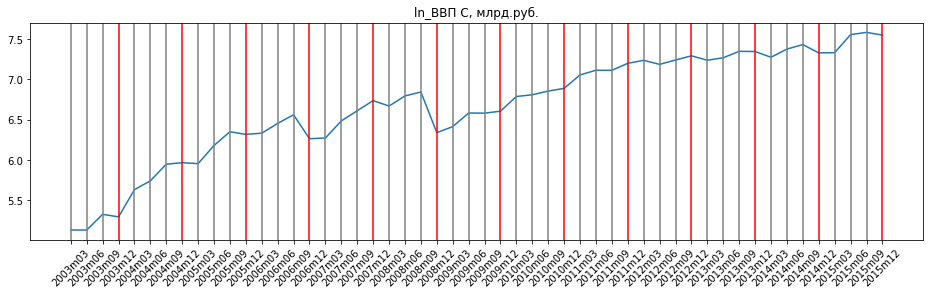

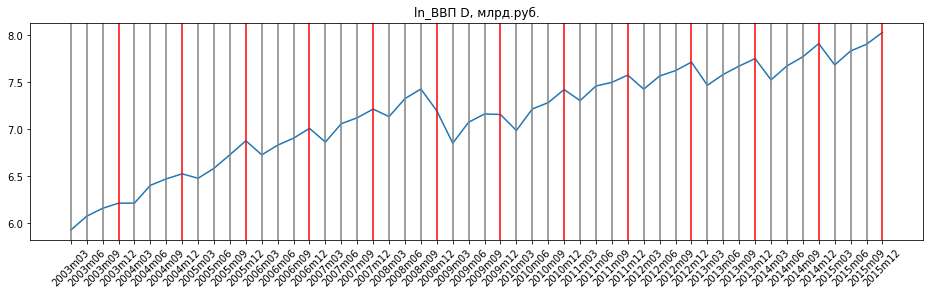

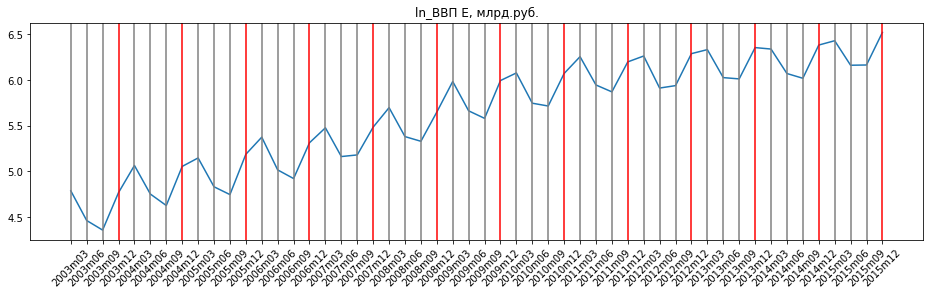

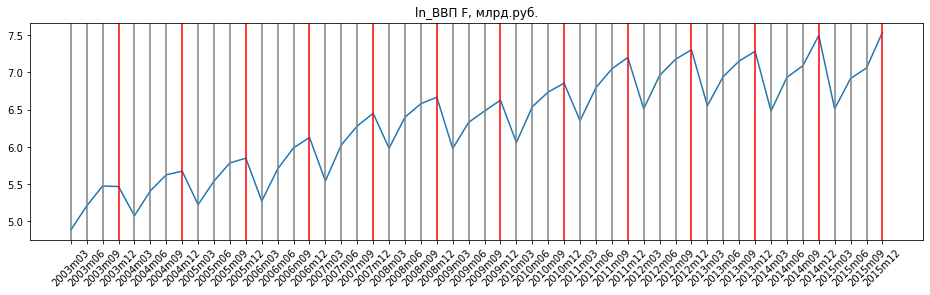

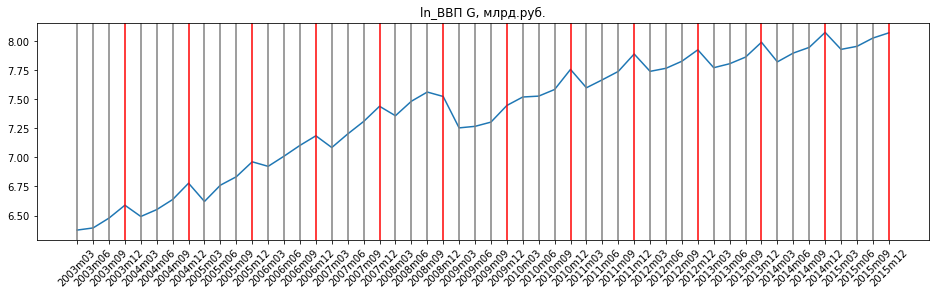

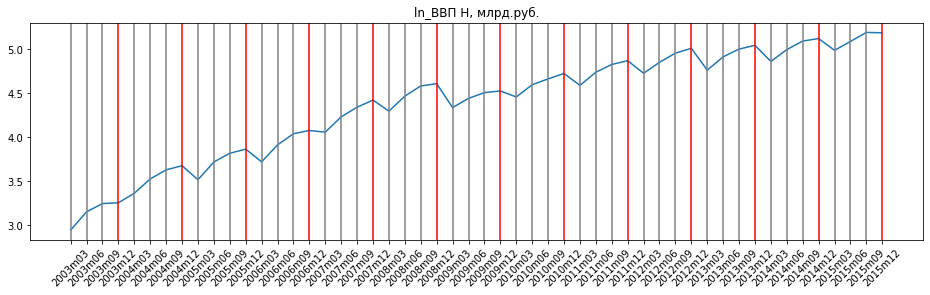

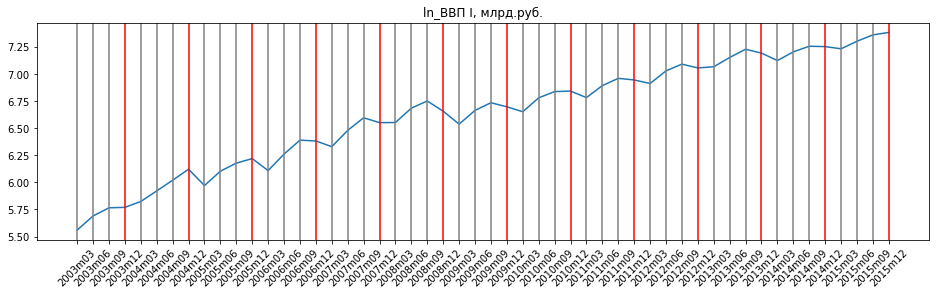

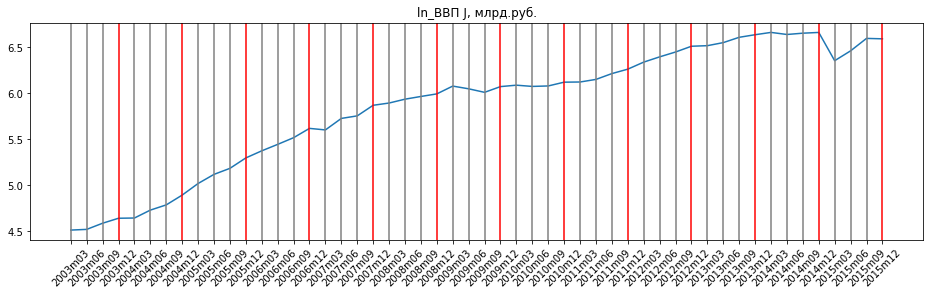

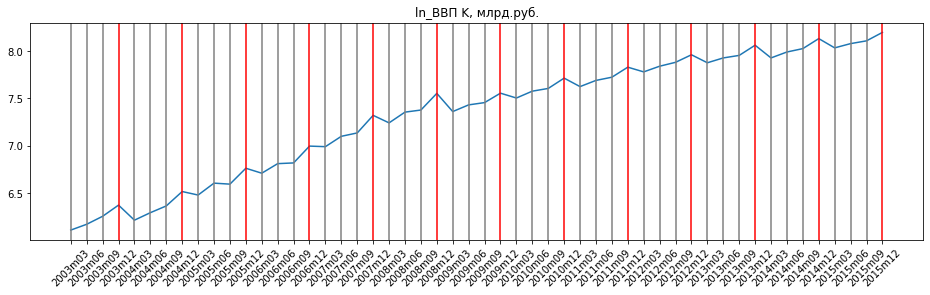

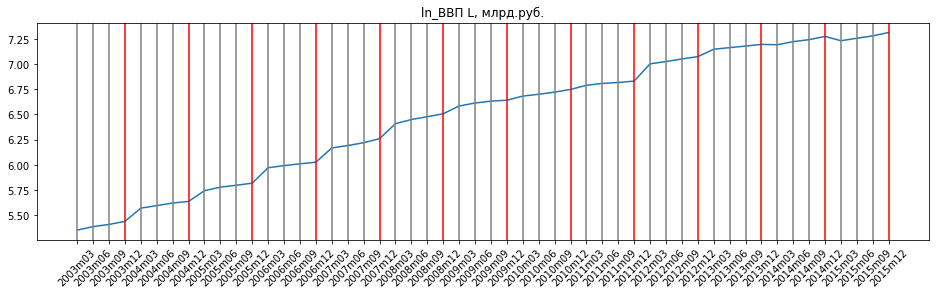

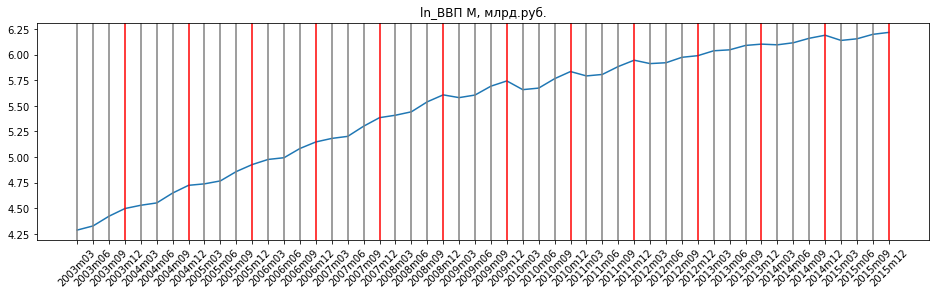

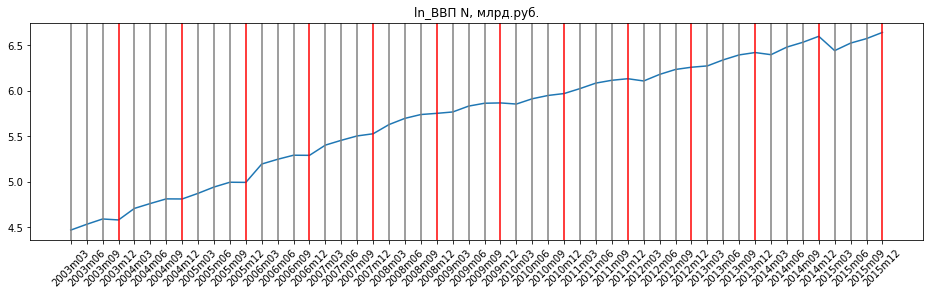

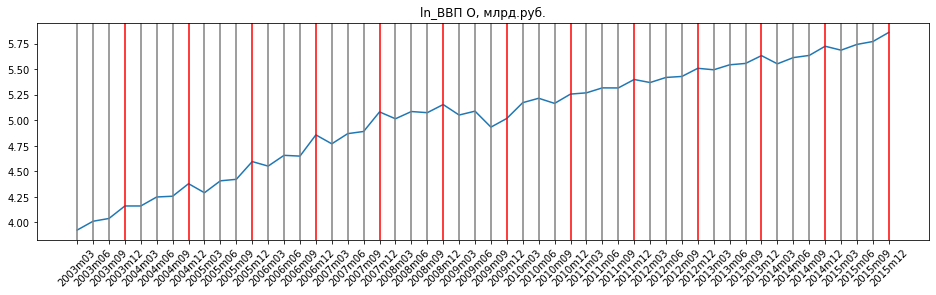

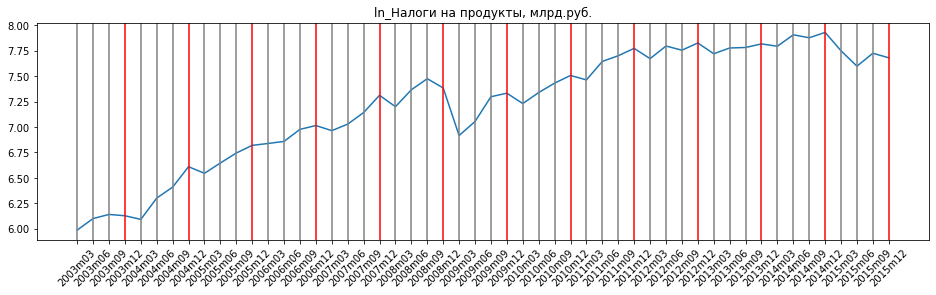

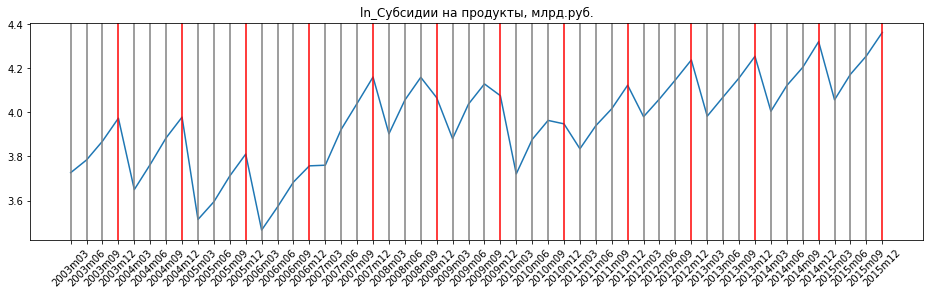

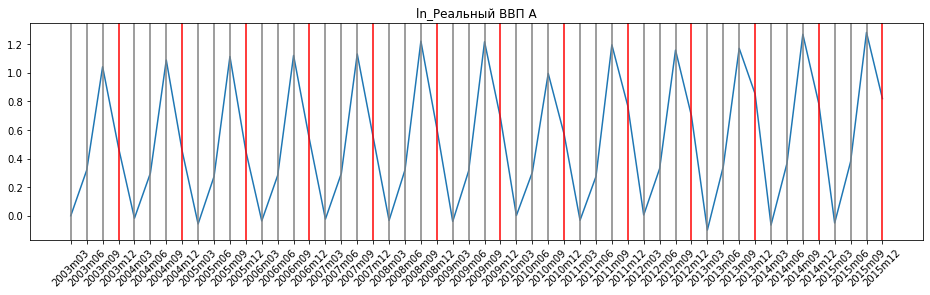

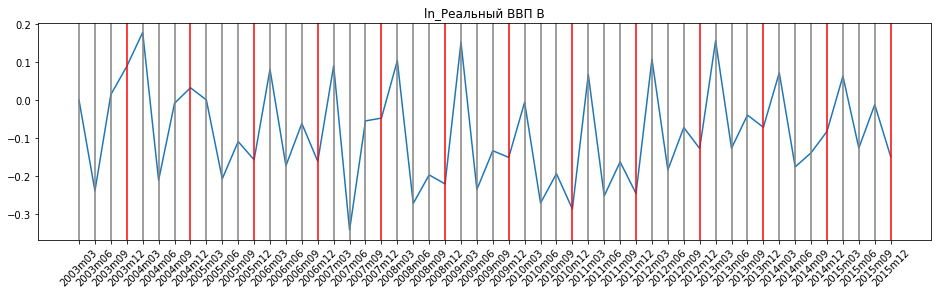

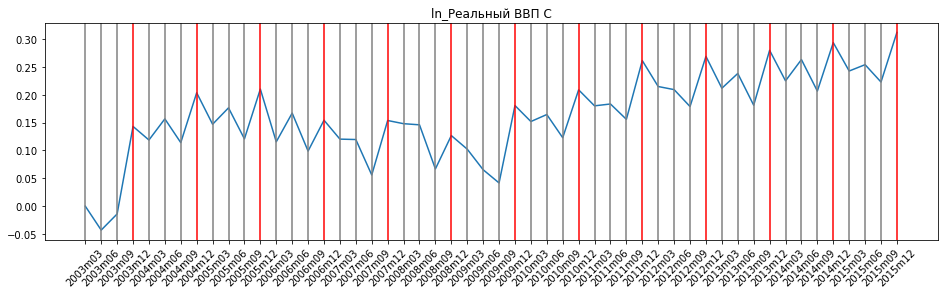

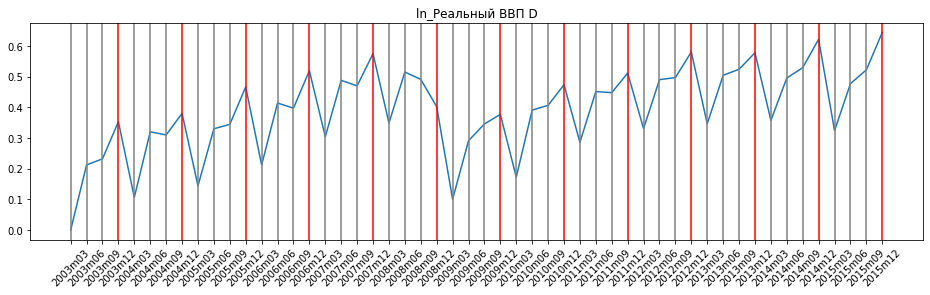

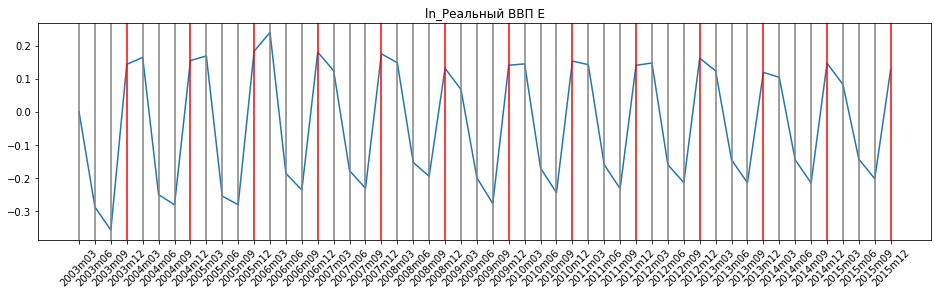

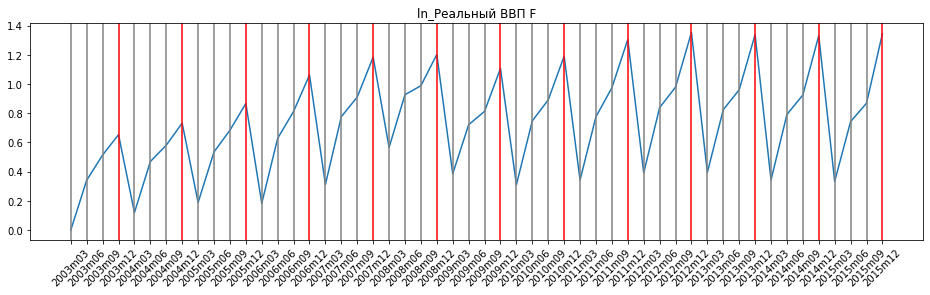

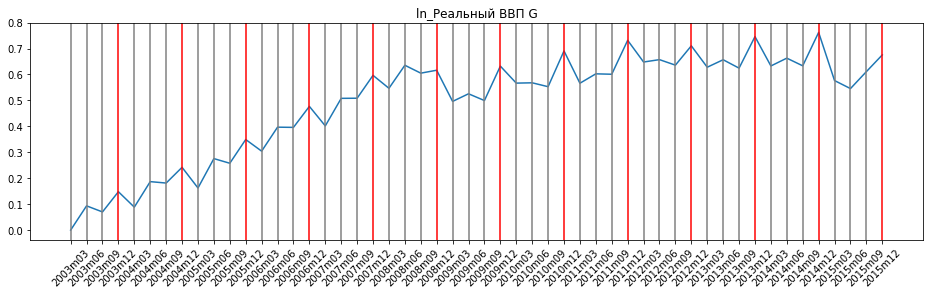

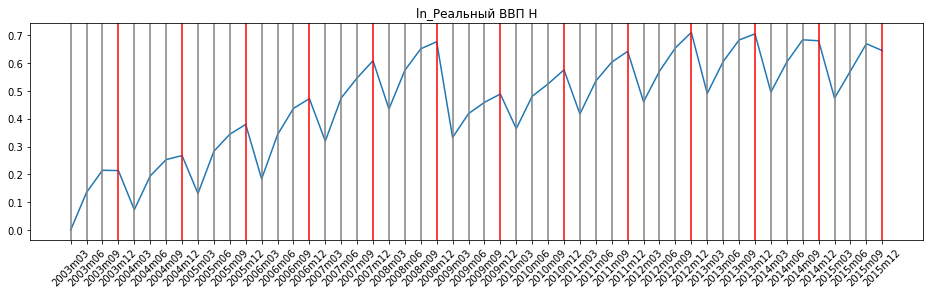

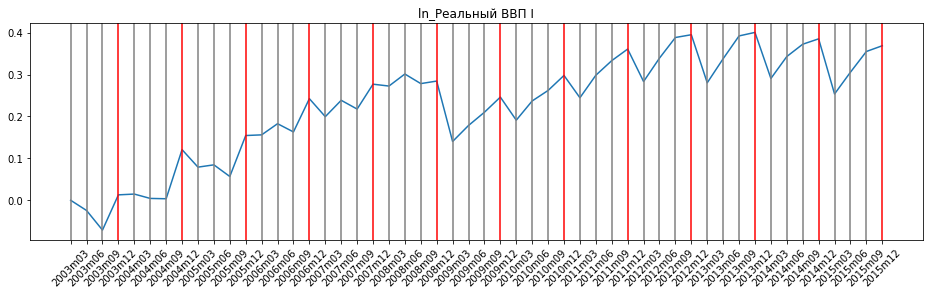

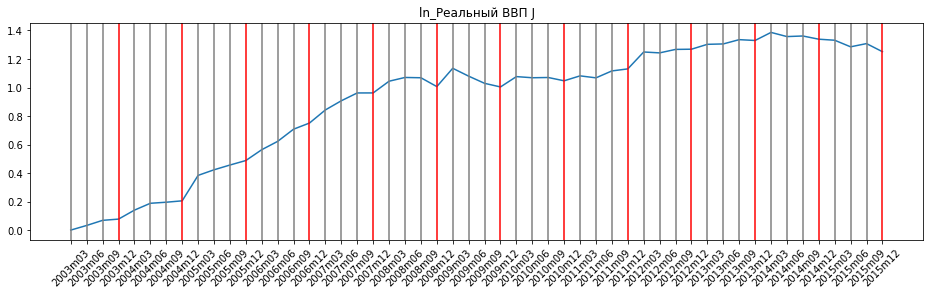

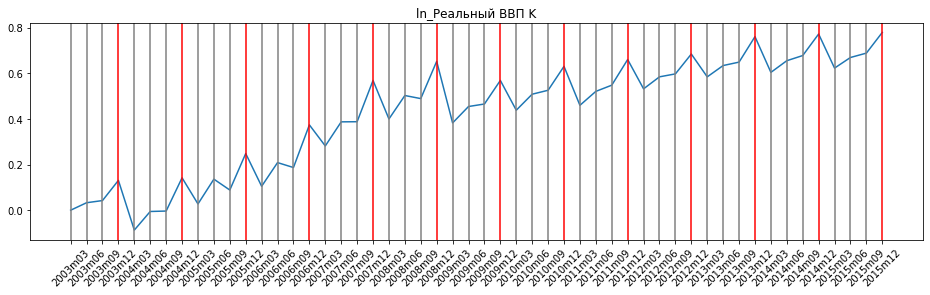

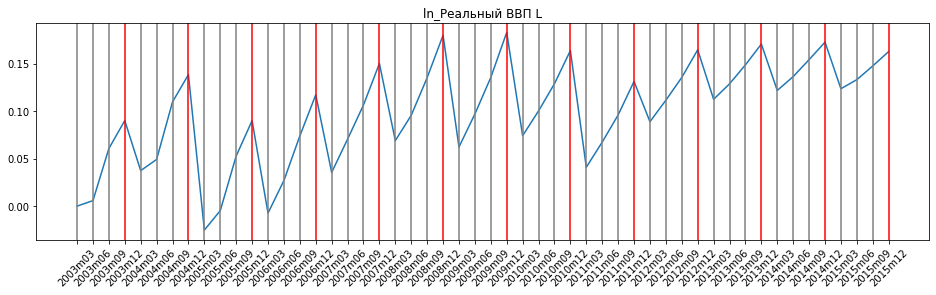

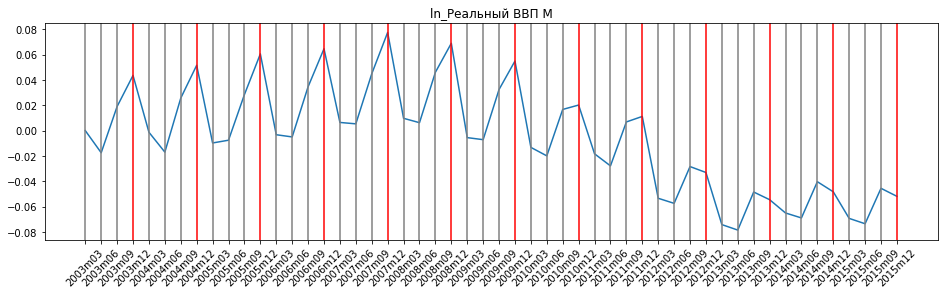

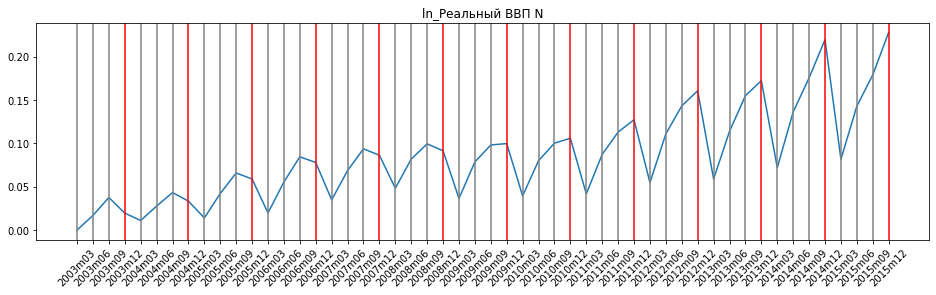

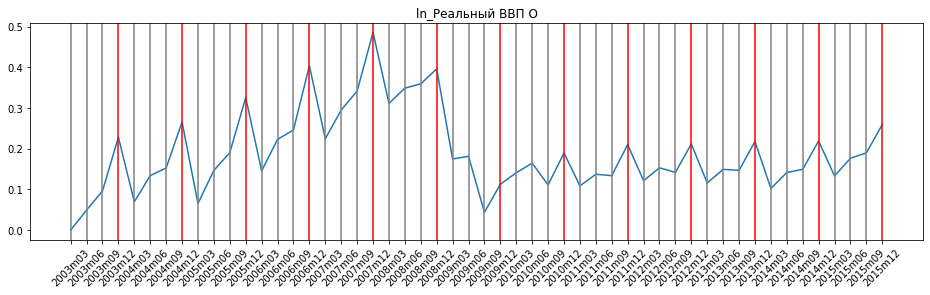

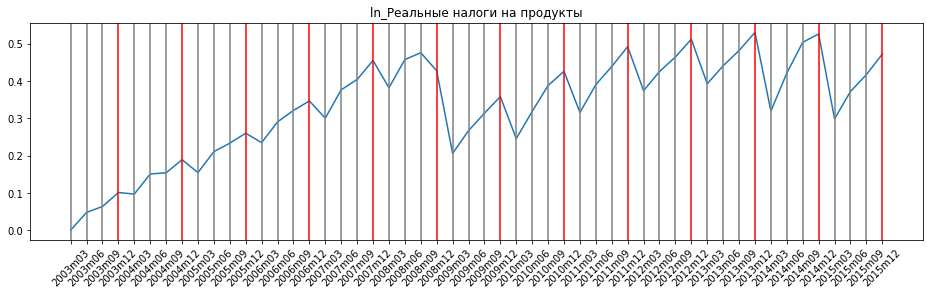

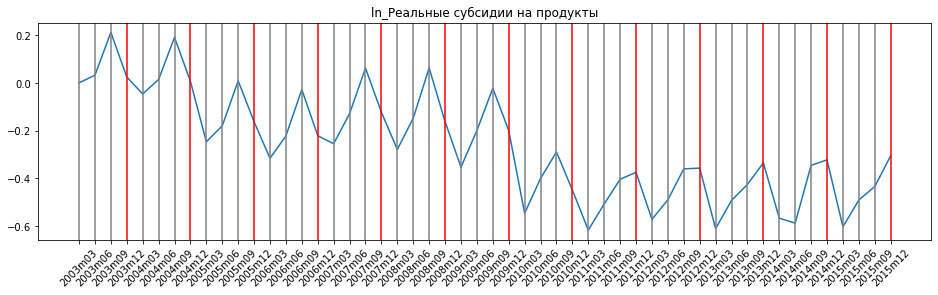

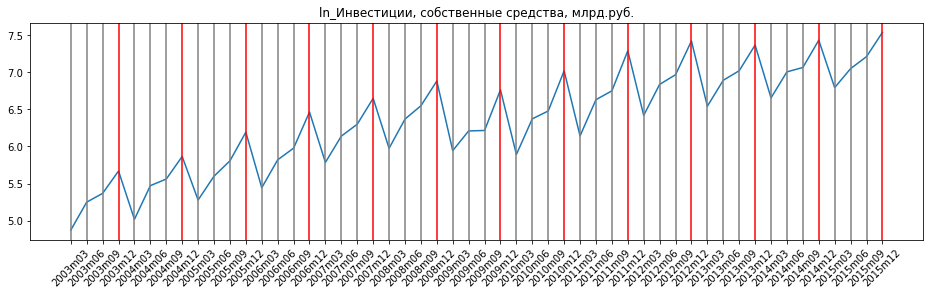

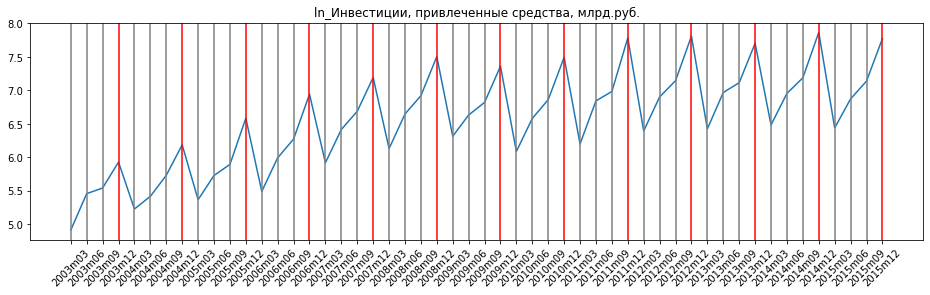

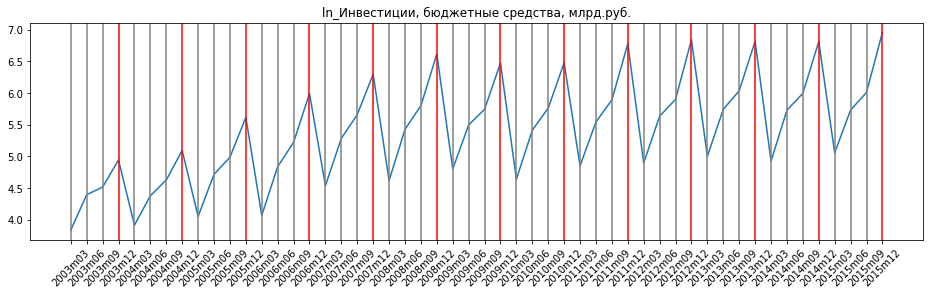

In [149]:
plot_every_col(train_q)

# Строим тест

In [215]:
test = pd.ExcelFile('data/Test_example8.xlsx')
# tes = inc_first_transfrow(train_m) 

In [345]:
dfd = {}
for _sheet_name in test.sheet_names:
    print(_sheet_name)
    dfd[_sheet_name] = test.parse(_sheet_name, index_col=0, na_values='Forecast').astype(float)
    display(test_df)    

Monthly


,Var1,Var2,Var3,Var4,Var5,Var6
01m01,0.359536,0.132582,0.393563,0.245396,0.725491,0.361585
01m02,0.649300,0.057989,0.791482,0.167988,0.917368,0.475835
01m03,0.356093,0.253167,0.407549,0.420061,0.233546,0.274702
01m04,0.221301,0.990120,0.968295,0.834213,0.962607,0.354539
01m05,0.601777,0.115620,0.275767,0.407797,0.757938,0.979110
...,...,...,...,...,...,...
10m08,0.529109,0.730549,0.082925,0.446264,0.573434,0.515754
10m09,0.031792,0.907304,0.494018,0.797674,0.410449,0.599142
10m10,0.431970,0.465777,0.517572,0.613106,0.941643,0.974778
10m11,0.227888,0.039983,0.526338,0.515258,0.611773,0.949958


Quarterly


,Var1,Var2,Var3,Var4,Var5,Var6
01m01,0.359536,0.132582,0.393563,0.245396,0.725491,0.361585
01m02,0.649300,0.057989,0.791482,0.167988,0.917368,0.475835
01m03,0.356093,0.253167,0.407549,0.420061,0.233546,0.274702
01m04,0.221301,0.990120,0.968295,0.834213,0.962607,0.354539
01m05,0.601777,0.115620,0.275767,0.407797,0.757938,0.979110
...,...,...,...,...,...,...
10m08,0.529109,0.730549,0.082925,0.446264,0.573434,0.515754
10m09,0.031792,0.907304,0.494018,0.797674,0.410449,0.599142
10m10,0.431970,0.465777,0.517572,0.613106,0.941643,0.974778
10m11,0.227888,0.039983,0.526338,0.515258,0.611773,0.949958


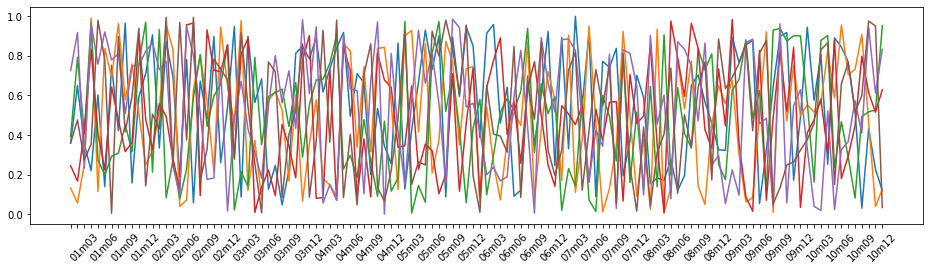

In [321]:
plt.figure(figsize=(16,4))
xlabels = [val if (i+1)%3==0 else '' for i,val in enumerate(test_df.index) ]
plt.xticks(ticks=range(0,len(xlabels)), 
           labels=xlabels,
           rotation=45)
plt.plot(test_df)

In [329]:
def plot_every_col_m_test(df):
#     ylines_x_grey = np.ravel([[f'{_y}m{_m:02d}' for _m in [3,6,9]] for _y in range(1, )])
#     ylines_x_red = np.ravel([[f'{_y}m{_m:02d}' for _m in [12]] for _y in range(2003, 2016)])
    for _col in df.columns:
        to_plot = df.loc[:, _col]
        plt.figure(figsize=(16,4))
        plt.title(_col)
#         xlabels = [val if (i+1)%3==0 else '' for i,val in enumerate(df.index) ]
        plt.xticks(
#             ticks=range(0,len(xlabels)), 
#                    labels=xlabels,
                   rotation=45)
        plt.plot(to_plot)
#         [plt.axvline(x=_yline_x, c='grey') for _yline_x in ylines_x_grey]
#         [plt.axvline(x=_yline_x, c='red') for _yline_x in ylines_x_red]
        plt.show()

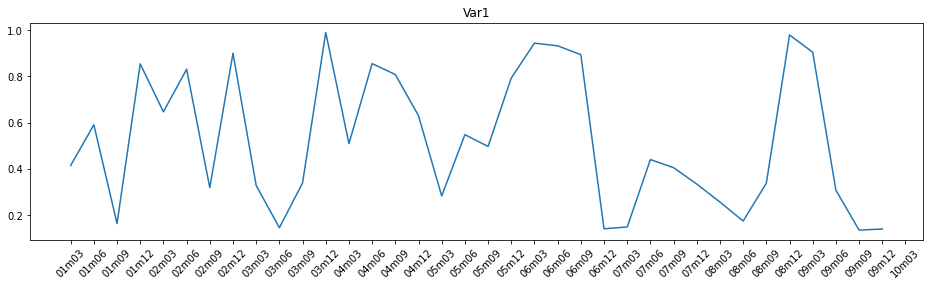

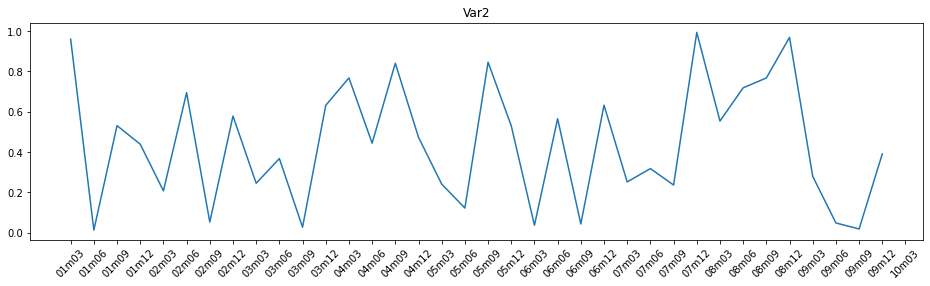

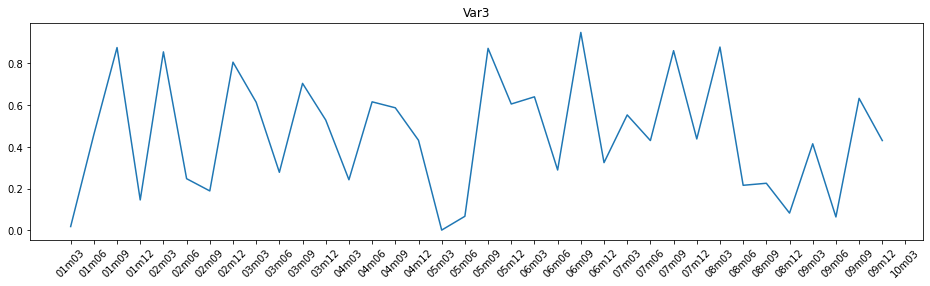

In [350]:
plot_every_col_m_test(dfd['Quarterly'])

# Метрика


In [196]:
y_true = list(map(np.array, [[1,2,3,4], [33,35]]))
y_pred = list(map(np.array, [[11,21,31,41], [2,3]]))

In [211]:
qq = [[1,2,3,4], [33,35,99,9,9,9,9,9,]]

In [214]:
K = sum(map(len, y_pred))

12

In [224]:
H = [4,2]
D = [2,5]
i = 0

In [225]:
(y_true[i]-y_pred[i])**2 / (H[i]*D[i])

array([ 12.5  ,  45.125,  98.   , 171.125])

In [404]:
D = []
for key, val in dfd.items():
    if key == 'Monthly': period=12
    else: period=4
    D.append(np.var(val.diff(period).dropna().T.values, axis=1))
D = np.concatenate(D)

In [418]:
def WMSFE(y_true, y_pred, dataframes_dictionary):
    wmsfe_cols = []
    # Computing overall number of predictions
    K = sum(map(len, y_pred))
    # Making matrix of H valus for every column
    H = np.array([np.array(range(1, len(y_pred_i)+1)) for y_pred_i in y_pred])
    # Computing variance for every column
    D = []
    for key, val in dfd.items():
        if key == 'Monthly': period=12
        else: period=4
        D.append(np.var(val.diff(period).dropna().T.values, axis=1))
    D = np.concatenate(D)
    for _col_i in range(len(y_pred)):
        wmsfe_cols.append((y_true[_col_i]-y_pred[_col_i])**2 / (H[_col_i]*D[_col_i]))
    wmsfe = np.sum(wmsfe_cols) /  K    
    return wmsfe  

In [419]:
dfd['Monthly'].iloc[2:6,:].values

array([[0.35609281, 0.25316724, 0.40754888, 0.42006057, 0.23354639,
        0.2747019 ],
       [0.22130085, 0.99011952, 0.96829474, 0.8342127 , 0.96260744,
        0.3545391 ],
       [0.60177704, 0.1156197 , 0.27576745, 0.40779747, 0.75793765,
        0.97911019],
       [0.14104853, 0.83638589, 0.19990207, 0.22533279, 0.92012764,
        0.77970842]])

In [422]:
WMSFE(dfd['Monthly'].iloc[2:6,:].values, dfd['Monthly'].iloc[3:7,:].values, dfd)

0.57920763269496

In [222]:
y_true, y_pred

([array([1, 2, 3, 4]), array([33, 35])],
 [array([11, 21, 31, 41]), array([2, 3])])

In [223]:
WMSFE(y_true, y_pred)

6 [[1, 2, 3, 4], [1, 2]]


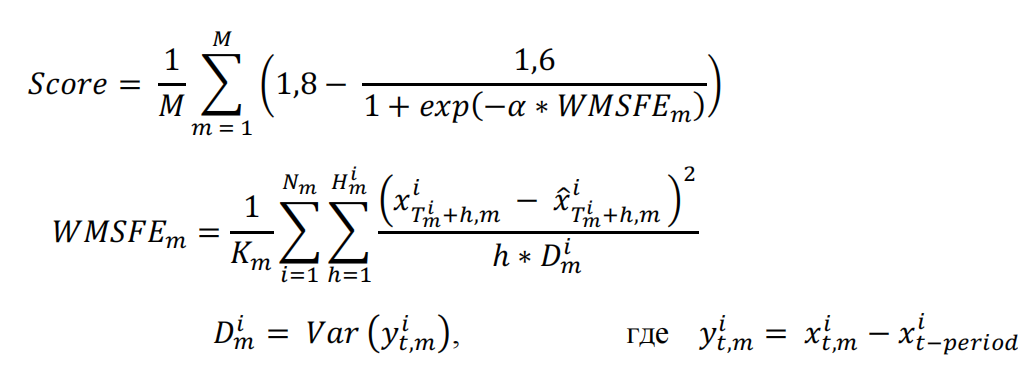

In [ ]:
for m in range(NUMBER_OF_TEST_FILES):
    